<a href="https://colab.research.google.com/github/breezingit/CIFAR10-Image-Classification/blob/main/Image_Classification_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will be using the CIFAR10 dataset to form the Image Classification Model. <br>
When classifiying digits using a simple NN, we flattened the image and passed it forward. This has a few drawbacks.
<ul>
<li> <mark>It does not capture local relationships.</mark> If you look at the image of a dog and want to classify it as a dog, you want to look at the shape of the ears, mouth etc. This means that the pixels close to each other have patterns and relationships which help in classification. Simply flattening an image losese such relationshps. <br>

```1,2,3``` <br>
```4,5,6``` <br>
Pixel 1 and 4 are close to each other and might have a close relationship. Flattening sends them far away and hence we lose the connection.

<li> <mark>Spatial invariance</mark> is not taken into account.
The objects inside the images can move around. The wing of an airplane can be at the top of the image or maybe at the bottom.
</ul>

This is why, we will be using Convolutional Neural Networks here There are two layers used in this network They are as following:<br>
<dl>
<dt>Convolution:

<dd>
First, a convolution uses a filter which is applied to the image in order to highlight certain features deemed important in the classification of the image. These filters can be to highlight simple features, such as vertical or horizontal lines to make it more obvious to the computer what it is looking at.

<dt> Pooling

<dd>
The pooling layer takes the image from the convolution (which is still an image as it is a 2-d matrix of values) and then applies a function to a section of the pixels. Typical examples of pooling layers use functions such as min, max and mean to result in a new pooled image.<br>

The benefit of pooling is that is drastically reduces the size of the image going into the next layer (either another convolution or the flattening layer before the fully connected layers).
</dt>
</dl>

In general, the more convolution layers you are using the better. However, there is a trade-off in training time. As you increase the number of convolution layers, you are increasing the detail in the image you are looking for.

For example the first layer may just find vertical edges in an image, the second layer then adds horizontal edges and then a third a certain type of curve. Each layer is adding more detail to the image that is being passed to the computer but more computations have to be performed. As you increase images there are diminishing returns for the accuracy in classification that can be achieved since you are looking for more specific details each time.

<a href="https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1">A great post for understanding CNNs</a>


In [57]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [3]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [4]:
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
  tar.extractall(path = './data')

In [5]:
from torch.utils import data
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['dog', 'deer', 'ship', 'automobile', 'truck', 'bird', 'frog', 'airplane', 'horse', 'cat']


## Converting folder to Tensor

In [6]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [7]:
dataset = ImageFolder(data_dir + '/train', transform = ToTensor())

In [8]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

The 3 in (3,32,32) refers to the 3 colour channels of the image

In [9]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


The imshow function of matplotlib expects the color channels to be the final arguments.So we will use the permute function. 
The dimensions of the image are: 3,32,32
img.permute has args: 1,2,0
So 1 index becomes the 0th index . Similarly,
others. Final dimensions: <br>
(3,32,32) -> (32,32,3) 

In [10]:
def show_image(img, label):
  print('Label: ', dataset.classes[label], "("+ str(label)+ ")")
  plt.imshow(img.permute(1,2,0))

Label:  airplane (0)


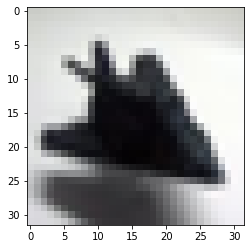

In [11]:
img, label= dataset[0]
show_image(img, label)

A lot of times we get values from a function as a tuple or something else. We take them in separate variables and then pass them to another function .Instead of the above code we can write *args

Label:  airplane (0)


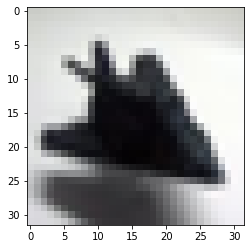

In [12]:
show_image(*dataset[0])

Label:  automobile (1)


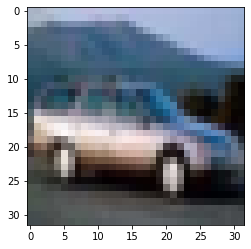

In [13]:
show_image(*dataset[5000])

Choosing a random seed to get the same images evertime random split is called

In [14]:
random_seed=42
torch.manual_seed(random_seed);
val_size=5000
train_size = len(dataset) - val_size

train_ds , val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

Batch Size only affects the training time. Start with 64 or something until the training time stops increasing.

In [15]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128

In [16]:
train_dl = DataLoader(train_ds, batch_size, shuffle= True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, shuffle= True, num_workers=4, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


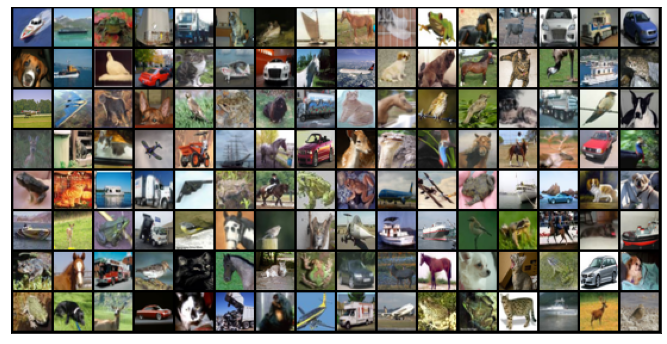

In [17]:
from torchvision.utils import make_grid

for images, labels in train_dl:
  fig,ax = plt.subplots(figsize=(12,6))
  ax.set_xticks([]);
  ax.set_yticks([]);
  ax.imshow(make_grid(images, nrow = 16).permute(1,2,0))
  break

In [18]:
import torch.nn as nn
import torch.nn.functional as F

In [19]:
# converting 3 channel image and converting it into an 8 channel output
# kernel size 3 means it is a 3x3 kernel

conv= nn.Conv2d(3,8, kernel_size= 3, stride=1, padding=1)

In [20]:
# pooling layer 
pool = nn.MaxPool2d(2,2)

In [21]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

Making a class that can be used again and again for Image Classification as the methods inside this class are common across Image Classification. This class can act as the parent class for further Classification classes.

In [22]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [23]:
class ImageClassificationModel(ImageClassificationBase):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        #input = 3 x 32 x 32
        nn.Conv2d(3,32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64, kernel_size= 3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        #output = 64 x 16 x 16

        nn.Conv2d(64,128, kernel_size=3, stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,128, kernel_size= 3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        #output = 128 x 8 x 8

        nn.Conv2d(128,256, kernel_size=3, stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,256, kernel_size= 3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        #output = 256 x 4 x 4

        nn.Flatten(),
        nn.Linear(256*4*4, 1024),
        nn.ReLU(),
        nn.Linear(1024, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, xb):
    return self.network(xb)

In [24]:
model = ImageClassificationModel()

In [25]:
model

ImageClassificationModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linea

# CONNECTING TO THE GPU

In [26]:
def get_default_device():
  if torch.cuda.is_available():
    return torch.device("cuda")
  else:
    return torch.device("cpu")
  
device= get_default_device()

def to_device(data, device):
  if isinstance(data, (list, tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)
  
class DeviceDataLoader():
  def __init__(self, dl, device):
      self.dl = dl
      self.device= device
  
  def __iter__(self):
    for b in self.dl:
      yield to_device(b, self.device)
    
  def __len__(self):
    return len(self.dl)

In [27]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

ImageClassificationModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linea

In [28]:
@torch.no_grad()  # dont compute any gradients while we are evaluating the model
def evaluate(model, val_loader):
    model.eval() #telling pytorch we are evaluating the model here
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)
  
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()  #telling pytorch we are training the model here
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss']= torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [29]:
model = to_device(model, device)

In [30]:
evaluate(model, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.10363052040338516, 'val_loss': 2.3031394481658936}

In [31]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [32]:
# history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [33]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [34]:
# plot_accuracies(history)

In [35]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

In [36]:
# plot_losses(history)

We can see that after epoch 6, the model started overfitting.
The model has started learning specific examples from the  training data rather than the features. It learns stuff like classifying a beak like structure in front of a blue background as a bird while it could be anything else.
<br> We can either stop training the model at epoch 6 or apply other strategies like Data Augmentation and Regularization.

# Data Augmentation
We will be doing Data normalization. The values of red pixels might be more skewed towards the negative side while the green ones more towards the positive side.<br>
<ul>
<li>
Normalizing will help prevent just one channel from affecting the losses and gradients in our model just because it had a higher value than others.
<li>
Next we will do some randomized Data Augmentation. The model overfits when it starts to learn features from some specific image. So we will randomly apply some transformations to images.
</ul>

In [37]:
from numpy import asarray
from PIL import Image
import torchvision
import torchvision.transforms as T
from statistics import mean
# load image
# image = Image.open('data/cifar10/train/airplane/0001.png')

def getMeansAndStd(dataset):
  transform = T.ToPILImage()
  meansList = []
  stdList = []
  for tens in dataset:

    image = transform(tens[0])
    pixels = asarray(image)
    # convert from integers to floats
    pixels = pixels.astype('float32')
    pixels = pixels/255.0
    # calculate per-channel means and standard deviations
    means = pixels.mean(axis=(0,1), dtype='float64')
    meansList.append(means)

    ####

    stds = pixels.std(axis=(0,1), dtype='float64')
    stdList.append(stds)

  redMean = sum([v[0] for v in meansList]) / float(len(meansList))
  greenMean = sum([v[1] for v in meansList]) / float(len(meansList))
  blueMean = sum([v[2] for v in meansList]) / float(len(meansList))

  redStd = sum([v[0] for v in stdList]) / float(len(stdList))
  greenStd = sum([v[1] for v in stdList]) / float(len(stdList))
  blueStd = sum([v[2] for v in stdList]) / float(len(stdList))

  return ((redMean, greenMean, blueMean), (redStd, blueStd, greenStd))


# print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
# # per-channel centering of pixels
# pixels -= means
# # confirm it had the desired effect
# means = pixels.mean(axis=(0,1), dtype='float64')
# print('Means: %s' % means)
# print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))

In [38]:
stats = getMeansAndStd(dataset)
print(stats)

((0.49139968987818744, 0.48215841962618317, 0.44653092422829627), (0.2022021197004178, 0.20086346438507557, 0.19931542061461852))


In [39]:
import torchvision.transforms as tt

# Compose function helps to bunch a number of transformations together
train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])

# shouldnt be tranforming the val dataset, keeping the data close to the real
# world data, though we will be using normalisation transformation 
# because we have trained our model on normalised images and it no longer 
# understands regular images
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [40]:
train_ds = ImageFolder(data_dir + '/train', train_tfms)
valid_ds = ImageFolder(data_dir + '/train', valid_tfms)

In [41]:
batch_size = 400

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Seeing the data finally

In [42]:
# we need to denormalize the data while seeing it 
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        denorm_images = denormalize(images, *stats)
        # picking the first 64 images and putting them in 8 rows
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


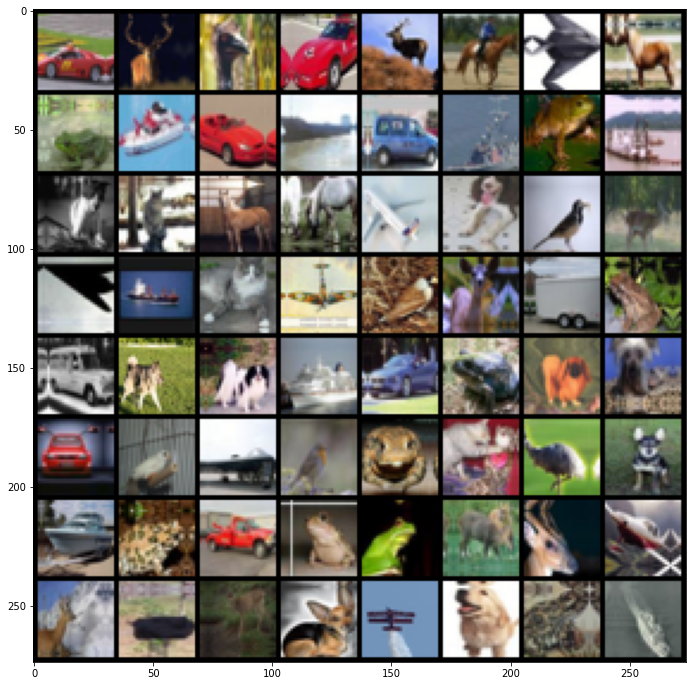

In [43]:
show_batch(train_dl)

We can clearly see the reflections of the images inside them which was part of the normalisation

In [44]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

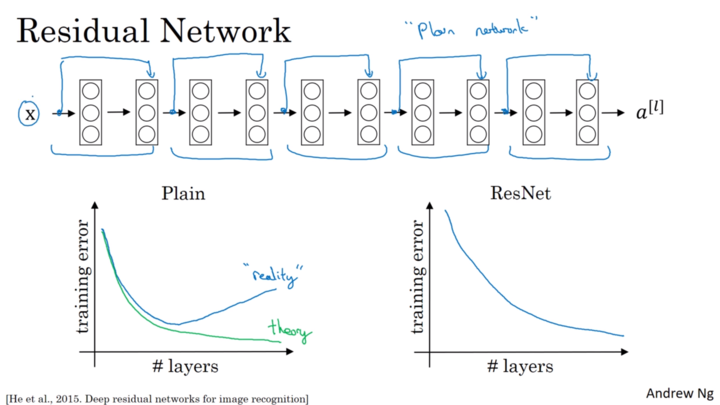
## RESNET

The idea is that learning new features takes time and adding more contributes to overfitting. What we can do is make the input `skip connection` and move a few layers ahead. What this does is that it will be easier for the model to learn the difference between F(x)+x and F(x), F(x) being the input, rather than trying to learn some G(x) from F(x).

Training The Model:
We make a few improvements here in our fit function:
1. Learning Rate Scheduling: Increasing the learning rate at first so it reaches the minimum faster and when it's near the minimum (the loss starts jumping around) then decreasing it. 
2. Weight decay and Gradient Clipping: We make sure all our weights and gradients are in a fairly reasonable range.

In [46]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase): # 9 showing the total number of layers
      # in the model
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2), # to prevent our model
        # overfitting, we intentionally drop some weigths
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [47]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [48]:
epochs = 8
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [52]:
%%time
history = [evaluate(model, valid_dl)]
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 1.5810, val_acc: 0.4133
Epoch [1], val_loss: 1.3935, val_acc: 0.4836
Epoch [2], val_loss: 1.2234, val_acc: 0.5513
Epoch [3], val_loss: 1.0709, val_acc: 0.6139
Epoch [4], val_loss: 0.9644, val_acc: 0.6526
Epoch [5], val_loss: 0.8518, val_acc: 0.6947
Epoch [6], val_loss: 0.7736, val_acc: 0.7222
Epoch [7], val_loss: 0.7425, val_acc: 0.7352
CPU times: user 41.4 s, sys: 5.04 s, total: 46.4 s
Wall time: 5min 53s


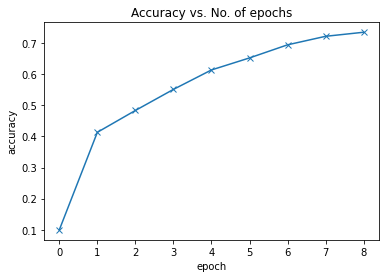

In [58]:
plot_accuracies(history)

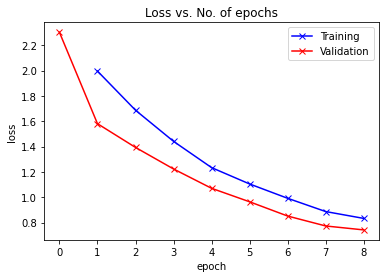

In [59]:
plot_losses(history)

In [60]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return train_ds.classes[preds[0].item()]

Label: airplane , Predicted: airplane


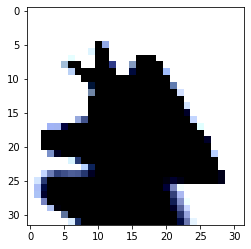

In [61]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:',  predict_image(img, model))

Label: automobile , Predicted: automobile


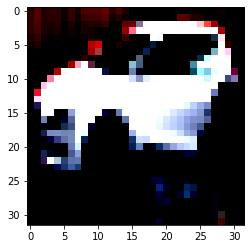

In [63]:
img, label = valid_ds[6212]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:',  predict_image(img, model))